In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('zomato_pune_V002.csv')

In [3]:
data

,Restaurant_Name,Web_Link,Locality,Sponsored,Ratings_out_of_5,Number of votes,Phone_number,Cuisines,Charges_for_two,payment_modes,...,Table booking recommended,Resto Bar,Serves Alcohol,Breakfast,Catering Available,Disabled Friendly,Serves Halal,Takeaway Only,BYOB Only,spam_review
0,AB's - Absolute Barbecues,https://www.zomato.com/pune/abs-absolute-barbe...,Hinjawadi,Casual Dining,4.9,7029 votes,+91 9373112211,"Continental, North Indian, Chinese","₹1,400",Cash and Cards accepted,...,1,0,0,0,0,0,0,0,0,1539.0
1,Cafe Co2 Resto Lounge,https://www.zomato.com/pune/cafe-co2-resto-lou...,Bhugaon,"Lounge, Casual Dining",4.6,2578 votes,080 46971866,"North Indian, Chinese, Continental, Kebab, Sea...","₹1,500",Cash and Cards accepted,...,1,0,0,0,0,0,0,0,0,139.0
2,Paasha - JW Marriott Pune,https://www.zomato.com/pune/paasha-jw-marriott...,Senapati Bapat Road,Fine Dining,4.6,3291 votes,080 46971369,"North Indian, Kebab, Biryani","₹2,500","Cash,Cards and Digital Payments accepted",...,1,0,0,0,0,0,0,0,0,119.0
3,I Amsterdam,https://www.zomato.com/pune/i-amsterdam-hinjawadi,Hinjawadi,"Casual Dining, Bar",4.3,430 votes,+91 8669698666 +91 8669697666,"Asian, European, Modern Indian, Italian","₹1,400","Cash,Cards and Digital Payments accepted",...,1,0,0,0,0,0,0,0,0,8.0
4,FC Road Social,https://www.zomato.com/pune/fc-road-social-shi...,Shivaji Nagar,"Bar, Casual Dining",4.5,2138 votes,+91 9172378889 020 29805112,"North Indian, Chinese, Biryani, American, Cont...","₹1,500","Cash,Cards and Digital Payments accepted",...,0,0,0,1,0,0,0,0,0,132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12184,Nil Food Point,https://www.zomato.com/pune/nil-food-point-hin...,Hinjawadi,"Takeaway, Delivery",0,0,+91 9112898153,Chinese,Not Present,Cash and Digital Payments accepted,...,0,0,0,0,0,0,0,0,0,0.0
12185,Flirty Momo,https://www.zomato.com/pune/flirty-momo-kharadi,Kharadi,"Takeaway, Delivery",0,0,+91 8237524902,"Mongolian, Pizza, Chinese, Beverages",Not Present,Cash only,...,0,0,0,0,0,0,0,0,0,0.0
12186,Hunger Treat,https://www.zomato.com/pune/hunger-treat-katraj,Katraj,Quick Bites,0,0,+91 7721098589,"South Indian, Fast Food, Chinese",₹300,Cash and Digital Payments accepted,...,0,0,0,0,0,0,0,0,0,0.0
12187,Bungalow 424,https://www.zomato.com/pune/bungalow-424-kothrud,Kothrud,"Casual Dining, Bar",0,0,+91 7709367942,"North Indian, Fast Food, Continental","₹1,200","Cash,Cards and Digital Payments accepted",...,1,0,0,0,0,0,0,0,0,0.0


In [4]:
data.shape

(12189, 104)

In [5]:
data.columns

Index(['Restaurant_Name', 'Web_Link', 'Locality', 'Sponsored',
       'Ratings_out_of_5', 'Number of votes', 'Phone_number', 'Cuisines',
       'Charges_for_two', 'payment_modes',
       ...
       'Table booking recommended', 'Resto Bar', 'Serves Alcohol', 'Breakfast',
       'Catering Available', 'Disabled Friendly', 'Serves Halal',
       'Takeaway Only', 'BYOB Only', 'spam_review'],
      dtype='object', length=104)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12189 entries, 0 to 12188
Columns: 104 entries, Restaurant_Name to spam_review
dtypes: float64(1), int64(86), object(17)
memory usage: 9.7+ MB


In [7]:
data.isnull().sum()

Restaurant_Name      0
Web_Link             0
Locality             0
Sponsored            0
Ratings_out_of_5     0
                    ..
Disabled Friendly    0
Serves Halal         0
Takeaway Only        0
BYOB Only            0
spam_review          0
Length: 104, dtype: int64

In [8]:
df = data.drop(['Serves Halal', 'BYOB Only','Rest_timming'], axis = 1) # dropped 'Serves Halal' and 'BYOB Only' columns

In [9]:
df.head()

,Restaurant_Name,Web_Link,Locality,Sponsored,Ratings_out_of_5,Number of votes,Phone_number,Cuisines,Charges_for_two,payment_modes,...,Private Dining Area Available,Smoking Are,Table booking recommended,Resto Bar,Serves Alcohol,Breakfast,Catering Available,Disabled Friendly,Takeaway Only,spam_review
0,AB's - Absolute Barbecues,https://www.zomato.com/pune/abs-absolute-barbe...,Hinjawadi,Casual Dining,4.9,7029 votes,+91 9373112211,"Continental, North Indian, Chinese","₹1,400",Cash and Cards accepted,...,0,0,1,0,0,0,0,0,0,1539.0
1,Cafe Co2 Resto Lounge,https://www.zomato.com/pune/cafe-co2-resto-lou...,Bhugaon,"Lounge, Casual Dining",4.6,2578 votes,080 46971866,"North Indian, Chinese, Continental, Kebab, Sea...","₹1,500",Cash and Cards accepted,...,0,1,1,0,0,0,0,0,0,139.0
2,Paasha - JW Marriott Pune,https://www.zomato.com/pune/paasha-jw-marriott...,Senapati Bapat Road,Fine Dining,4.6,3291 votes,080 46971369,"North Indian, Kebab, Biryani","₹2,500","Cash,Cards and Digital Payments accepted",...,0,0,1,0,0,0,0,0,0,119.0
3,I Amsterdam,https://www.zomato.com/pune/i-amsterdam-hinjawadi,Hinjawadi,"Casual Dining, Bar",4.3,430 votes,+91 8669698666 +91 8669697666,"Asian, European, Modern Indian, Italian","₹1,400","Cash,Cards and Digital Payments accepted",...,0,1,1,0,0,0,0,0,0,8.0
4,FC Road Social,https://www.zomato.com/pune/fc-road-social-shi...,Shivaji Nagar,"Bar, Casual Dining",4.5,2138 votes,+91 9172378889 020 29805112,"North Indian, Chinese, Biryani, American, Cont...","₹1,500","Cash,Cards and Digital Payments accepted",...,0,0,0,0,0,1,0,0,0,132.0


In [10]:
df.dropna(inplace = True)

In [11]:
df.isnull().sum()

Restaurant_Name       0
Web_Link              0
Locality              0
Sponsored             0
Ratings_out_of_5      0
                     ..
Breakfast             0
Catering Available    0
Disabled Friendly     0
Takeaway Only         0
spam_review           0
Length: 101, dtype: int64

In [12]:
df.duplicated().sum()

55

In [13]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [14]:
df = df.rename(columns = {'Charges_for_two':'Cost',
                         'Web_Link':'Zomato_Link', 'Smoking Are': 'Smoking ALlowed'})

In [15]:
df.head()

,Restaurant_Name,Zomato_Link,Locality,Sponsored,Ratings_out_of_5,Number of votes,Phone_number,Cuisines,Cost,payment_modes,...,Private Dining Area Available,Smoking ALlowed,Table booking recommended,Resto Bar,Serves Alcohol,Breakfast,Catering Available,Disabled Friendly,Takeaway Only,spam_review
0,AB's - Absolute Barbecues,https://www.zomato.com/pune/abs-absolute-barbe...,Hinjawadi,Casual Dining,4.9,7029 votes,+91 9373112211,"Continental, North Indian, Chinese","₹1,400",Cash and Cards accepted,...,0,0,1,0,0,0,0,0,0,1539.0
1,Cafe Co2 Resto Lounge,https://www.zomato.com/pune/cafe-co2-resto-lou...,Bhugaon,"Lounge, Casual Dining",4.6,2578 votes,080 46971866,"North Indian, Chinese, Continental, Kebab, Sea...","₹1,500",Cash and Cards accepted,...,0,1,1,0,0,0,0,0,0,139.0
2,Paasha - JW Marriott Pune,https://www.zomato.com/pune/paasha-jw-marriott...,Senapati Bapat Road,Fine Dining,4.6,3291 votes,080 46971369,"North Indian, Kebab, Biryani","₹2,500","Cash,Cards and Digital Payments accepted",...,0,0,1,0,0,0,0,0,0,119.0
3,I Amsterdam,https://www.zomato.com/pune/i-amsterdam-hinjawadi,Hinjawadi,"Casual Dining, Bar",4.3,430 votes,+91 8669698666 +91 8669697666,"Asian, European, Modern Indian, Italian","₹1,400","Cash,Cards and Digital Payments accepted",...,0,1,1,0,0,0,0,0,0,8.0
4,FC Road Social,https://www.zomato.com/pune/fc-road-social-shi...,Shivaji Nagar,"Bar, Casual Dining",4.5,2138 votes,+91 9172378889 020 29805112,"North Indian, Chinese, Biryani, American, Cont...","₹1,500","Cash,Cards and Digital Payments accepted",...,0,0,0,0,0,1,0,0,0,132.0


In [16]:
df['Cost'].unique()

array(['₹1,400', '₹1,500', '₹2,500', '₹1,700', '₹150', '₹1,300', '₹1,000',
       '₹250', '₹1,800', '₹1,600', '₹700', '₹900', '₹2,000', '₹600',
       '₹1,200', '₹550', '₹2,200', '₹1,100', '₹500', '₹850', '₹300',
       '₹2,100', '₹800', '₹400', '₹450', '₹650', '₹1,250', '₹950', '₹200',
       '₹3,200', '₹350', '₹100', 'Not Present', '₹1,900', '₹3,000',
       '₹750', '₹2,600', '₹2,700', '₹1,050', '₹1,350', '₹4,200', '₹4,000',
       '₹2,00,250', '₹2,400', '₹1,750', '₹3,100', '₹420', '₹1,150',
       '₹1,650', '₹2,900', '₹999', '₹1,950', '₹4,500', '₹280', '₹50',
       '₹1,550', '₹160', '₹110', '₹220', '₹120', '₹15', '₹2,800',
       '₹3,500'], dtype=object)

In [17]:
df['Ratings_out_of_5'].unique()

array(['4.9', '4.6', '4.3', '4.5', '4.0', '4.7', '4.2', '4.4', '4.1',
       '3.7', '0', '4.8', '3.9', '3.6', '3.4', '3.8', '2.9', '3.5', '3.2',
       '3.3', '2.1', '2.5', '2.4', '3.0', '3.1', '2.7', '2.6', '2.8',
       '2.3', '-', '2.2', '2.0', '3', '4'], dtype=object)

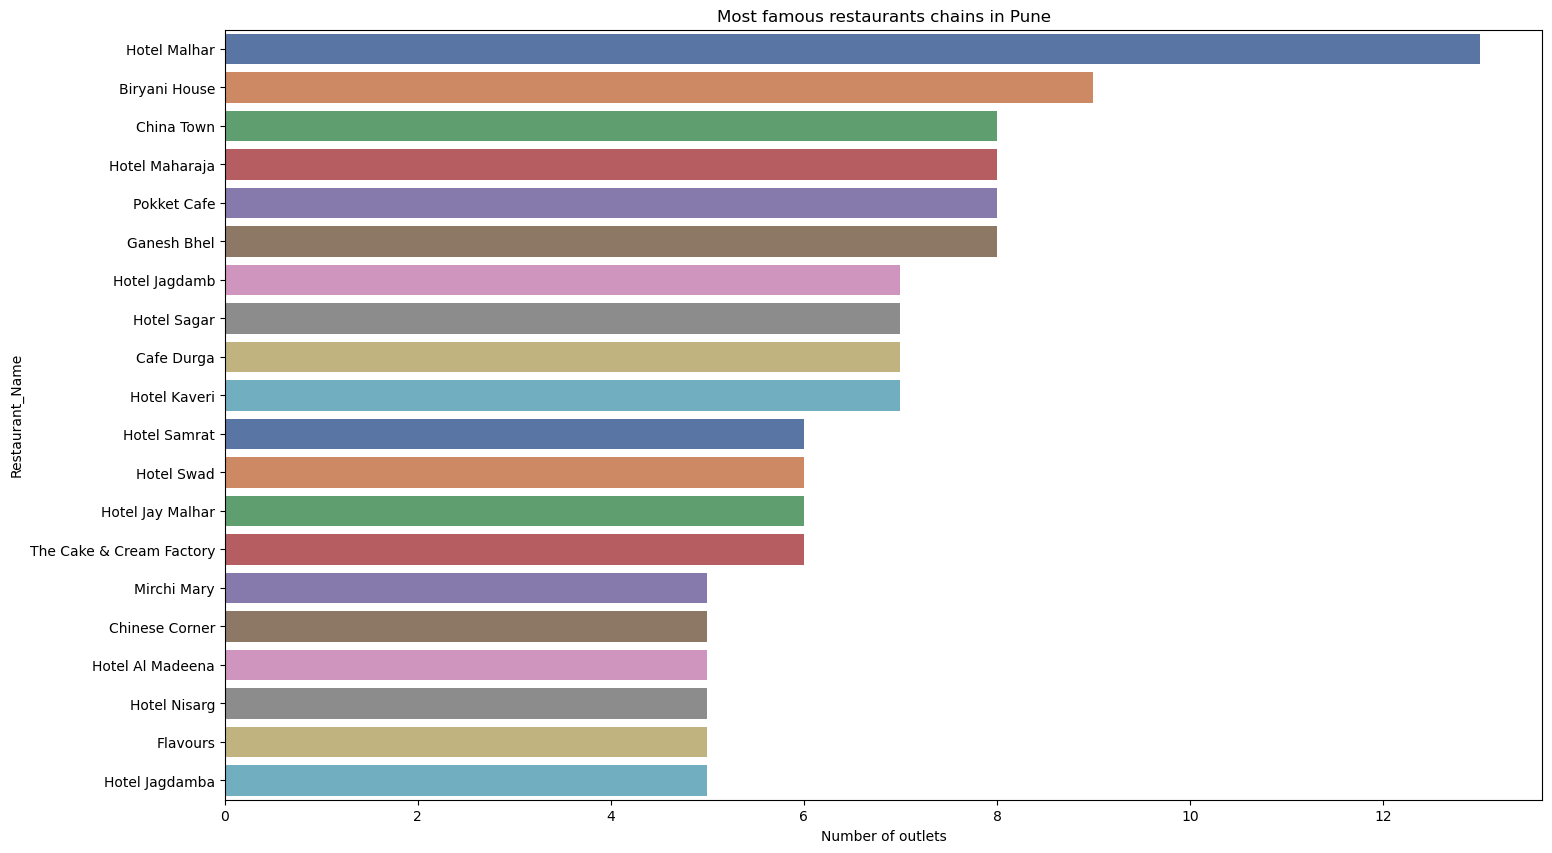

In [18]:
plt.figure(figsize = (17,10))
chains = df['Restaurant_Name'].value_counts()[:20]
sns.barplot(x = chains, y=  chains.index,  palette= 'deep')
plt.title('Most famous restaurants chains in Pune')
plt.xlabel('Number of outlets')
plt.show()

In [19]:
df['Serves Alcohol'].unique()

array([0, 1])

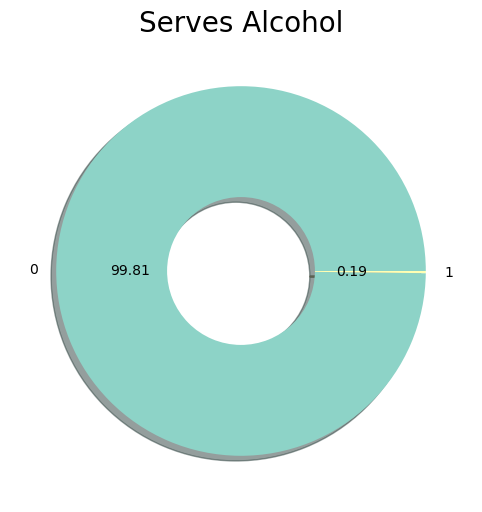

In [20]:
v = df['Serves Alcohol'].value_counts()
fig = plt.gcf()
fig.set_size_inches((10,6))
cmap = plt.get_cmap('Set3')
color = cmap(np.arange(len(v)))

plt.pie(v, labels = v.index, wedgeprops= dict(width = 0.6),autopct = '%0.02f', shadow = True, colors=  color)
plt.title('Serves Alcohol', fontsize = 20)
plt.show()

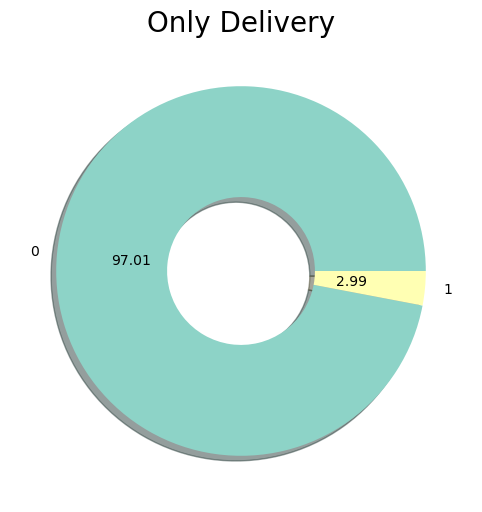

In [21]:
v = df['Takeaway Only'].value_counts()
fig = plt.gcf()
fig.set_size_inches((10,6))
cmap = plt.get_cmap('Set3')
color = cmap(np.arange(len(v)))

plt.pie(v, labels = v.index, wedgeprops= dict(width = 0.6),autopct = '%0.02f', shadow = True, colors=  color)
plt.title('Only Delivery', fontsize = 20)
plt.show()

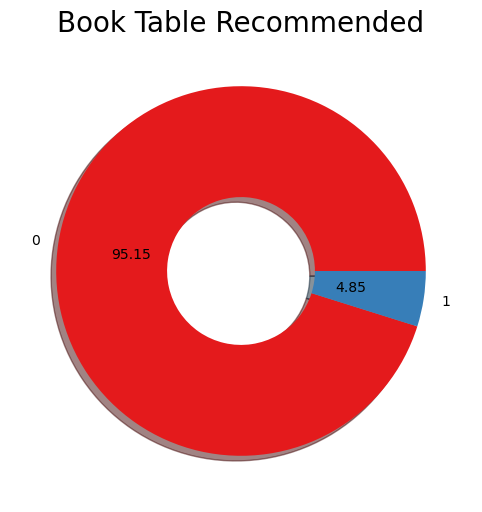

In [22]:
v = df['Table booking recommended'].value_counts()

fig = plt.gcf()
fig.set_size_inches((8,6))
cmap = plt.get_cmap('Set1')
color = cmap(np.arange(len(v)))

plt.pie(v, labels = v.index, wedgeprops= dict(width = 0.6),autopct = '%0.02f', shadow = True, colors=  color)
plt.title('Book Table Recommended', fontsize = 20)
plt.show()

In [23]:
df['Cost'] = df['Cost'].apply(lambda x:x.replace(',', '')) # lo
df['Cost'] = df['Cost'].apply(lambda x:x.replace('₹', ''))
df['Cost'] = df['Cost'].apply(lambda x:x.replace('Not Present', '0'))
#df['cost'] = df['cost'].astype(float)

df['Cost'].unique()

array(['1400', '1500', '2500', '1700', '150', '1300', '1000', '250',
       '1800', '1600', '700', '900', '2000', '600', '1200', '550', '2200',
       '1100', '500', '850', '300', '2100', '800', '400', '450', '650',
       '1250', '950', '200', '3200', '350', '100', '0', '1900', '3000',
       '750', '2600', '2700', '1050', '1350', '4200', '4000', '200250',
       '2400', '1750', '3100', '420', '1150', '1650', '2900', '999',
       '1950', '4500', '280', '50', '1550', '160', '110', '220', '120',
       '15', '2800', '3500'], dtype=object)

In [24]:
df['Cost'] = [float(element) for element in df['Cost']] #float conversion
df['Cost']

0        1400.0
1        1500.0
2        2500.0
3        1400.0
4        1500.0
          ...  
12184       0.0
12185       0.0
12186     300.0
12187    1200.0
12188     200.0
Name: Cost, Length: 12134, dtype: float64

In [25]:
df['Number of votes'] = df['Number of votes'].apply(lambda x:x.replace('votes', '').strip())
df['Number of votes'] = df['Number of votes'].apply(lambda x:x.replace('Based on', '').strip())
df['Number of votes'] = df['Number of votes'].apply(lambda x:x.replace('Na základě ', '').strip())
df['Number of votes'] = df['Number of votes'].apply(lambda x:x.replace('hlasů', '').strip())
df['Number of votes'] = df['Number of votes'].apply(lambda x:x.replace('Na základe hlasov ', '').strip())
df['Number of votes'] = df['Number of votes'].apply(lambda x:x.replace('votos', '').strip())
df['Number of votes'] = df['Number of votes'].apply(lambda x:x.replace('com base em ', '').strip())
df['Number of votes'] = df['Number of votes'].apply(lambda x:x.replace('głosów', '').strip())
df['Number of votes'] = df['Number of votes'].apply(lambda x:x.replace('hlasov', '').strip())
df['Number of votes'] = df['Number of votes'].astype(int)
df['Number of votes'].unique()

array([7029, 2578, 3291,  430, 2138, 4731, 2999, 1437, 2296, 3758,  370,
        948,  280, 3435,  259,  498,  317,  394, 4665,   78, 3243, 3006,
        382, 1334, 1983, 2938,  462, 2871, 3281, 2039, 1941, 1057, 3847,
          0, 3189, 1104, 1112,  910, 1737, 1531, 7002, 4715,  250,  216,
       2585,  230, 1956, 5660, 2930, 3552, 1429, 1942, 1461, 2642, 1617,
       2654, 1238, 1135,  866, 1971, 2401,  134, 3341, 2624, 2161, 1102,
       2758,  361, 4815,  970, 3441,  527, 3693, 2792,  362, 2450, 3790,
       2528, 3916, 2931, 1430,  938, 1647, 1894, 1044,  819,  179, 1303,
       1944,  773, 1042,  275,  987, 1438, 2857,  378,  247,  350,  742,
       3476,  589, 2486,  277,  890,  687, 2189, 2208,  294, 1641, 1861,
       1289, 3230,  516,  521, 1331,  723, 1158, 1670,  253, 5334, 1948,
         91, 3908, 3848,  741, 3081,  213,  431,  494,  210,  333,  883,
       1073, 1225,  149, 1576, 1505, 1173, 1709,  310,  257, 1816, 1297,
        671, 1528, 2283,  130,  943,  308, 2070,  4

In [26]:
df['Ratings_out_of_5'].unique()

array(['4.9', '4.6', '4.3', '4.5', '4.0', '4.7', '4.2', '4.4', '4.1',
       '3.7', '0', '4.8', '3.9', '3.6', '3.4', '3.8', '2.9', '3.5', '3.2',
       '3.3', '2.1', '2.5', '2.4', '3.0', '3.1', '2.7', '2.6', '2.8',
       '2.3', '-', '2.2', '2.0', '3', '4'], dtype=object)

In [27]:
df['Ratings_out_of_5'] = df['Ratings_out_of_5'].apply(lambda x:x.replace('-', '0'))
df['Ratings_out_of_5'] = [float(element) for element in df['Ratings_out_of_5']]
#df['Ratings_out_of_5'] = df['Ratings_out_of_5'].apply(lambda x:x.replace(0,df['Ratings_out_of_5'].mean()))
df['Ratings_out_of_5']

0        4.9
1        4.6
2        4.6
3        4.3
4        4.5
        ... 
12184    0.0
12185    0.0
12186    0.0
12187    0.0
12188    0.0
Name: Ratings_out_of_5, Length: 12134, dtype: float64

Text(0.5, 1.0, 'Rating Distribution')

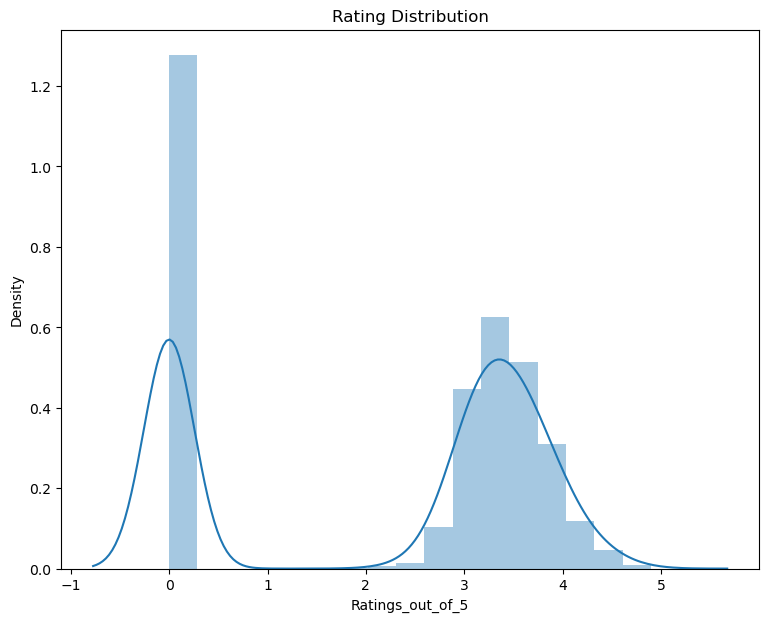

In [28]:
plt.figure(figsize = (9,7))
sns.distplot(df['Ratings_out_of_5'])
plt.title('Rating Distribution')

In [29]:
df['payment_modes'].unique()

array(['Cash and Cards accepted',
       'Cash,Cards and Digital Payments accepted', 'Cash only',
       'Cash and Digital Payments accepted',
       'Cash,Cards and Meal Coupons accepted',
       'Cash,Cards,Meal Coupons and Digital Payments accepted',
       'Cash,Debit Cards and Digital Payments accepted',
       'Cash and Debit Cards accepted', 'Cash and Meal Coupons accepted',
       'Debit Cards accepted',
       'Cash,Meal Coupons and Digital Payments accepted', 'Cards only'],
      dtype=object)

In [30]:
df['5_star_review_percentage'] = df['5_star_review_percentage'].apply(lambda x:x.replace('%', '').strip())
df['5_star_review_percentage'] = df['5_star_review_percentage'].astype(int)
df['5_star_review_percentage'].unique()

array([ 79,  61,  62,  45,  63,  74,  52,  53,  65,  43,  72,  57,  64,
        41,  60,  56,  70,  36,  58,  68,  37,  31,  49,  51,   0,  69,
        28,  48,  75,  67,  50,  44,  42,  32,  59,  33,  84,  46,  34,
        24,  35,  47,  81,  77,  55,  40,  54,  76,  39,  71,  88,  66,
        22,  23,  25,  38,  27,  73,  29,  30,  97,  80,  26,  83,  85,
        87,  82,  86,  19,  94,  98,  90,  99,  96,  91,  78,  93,  92,
        16,  17, 100,  14,  15,  11,  95,  10,  20,  18,  89,  21,  13,
         8,  12,   9,   7,   6,   5,   4,   2,   3])

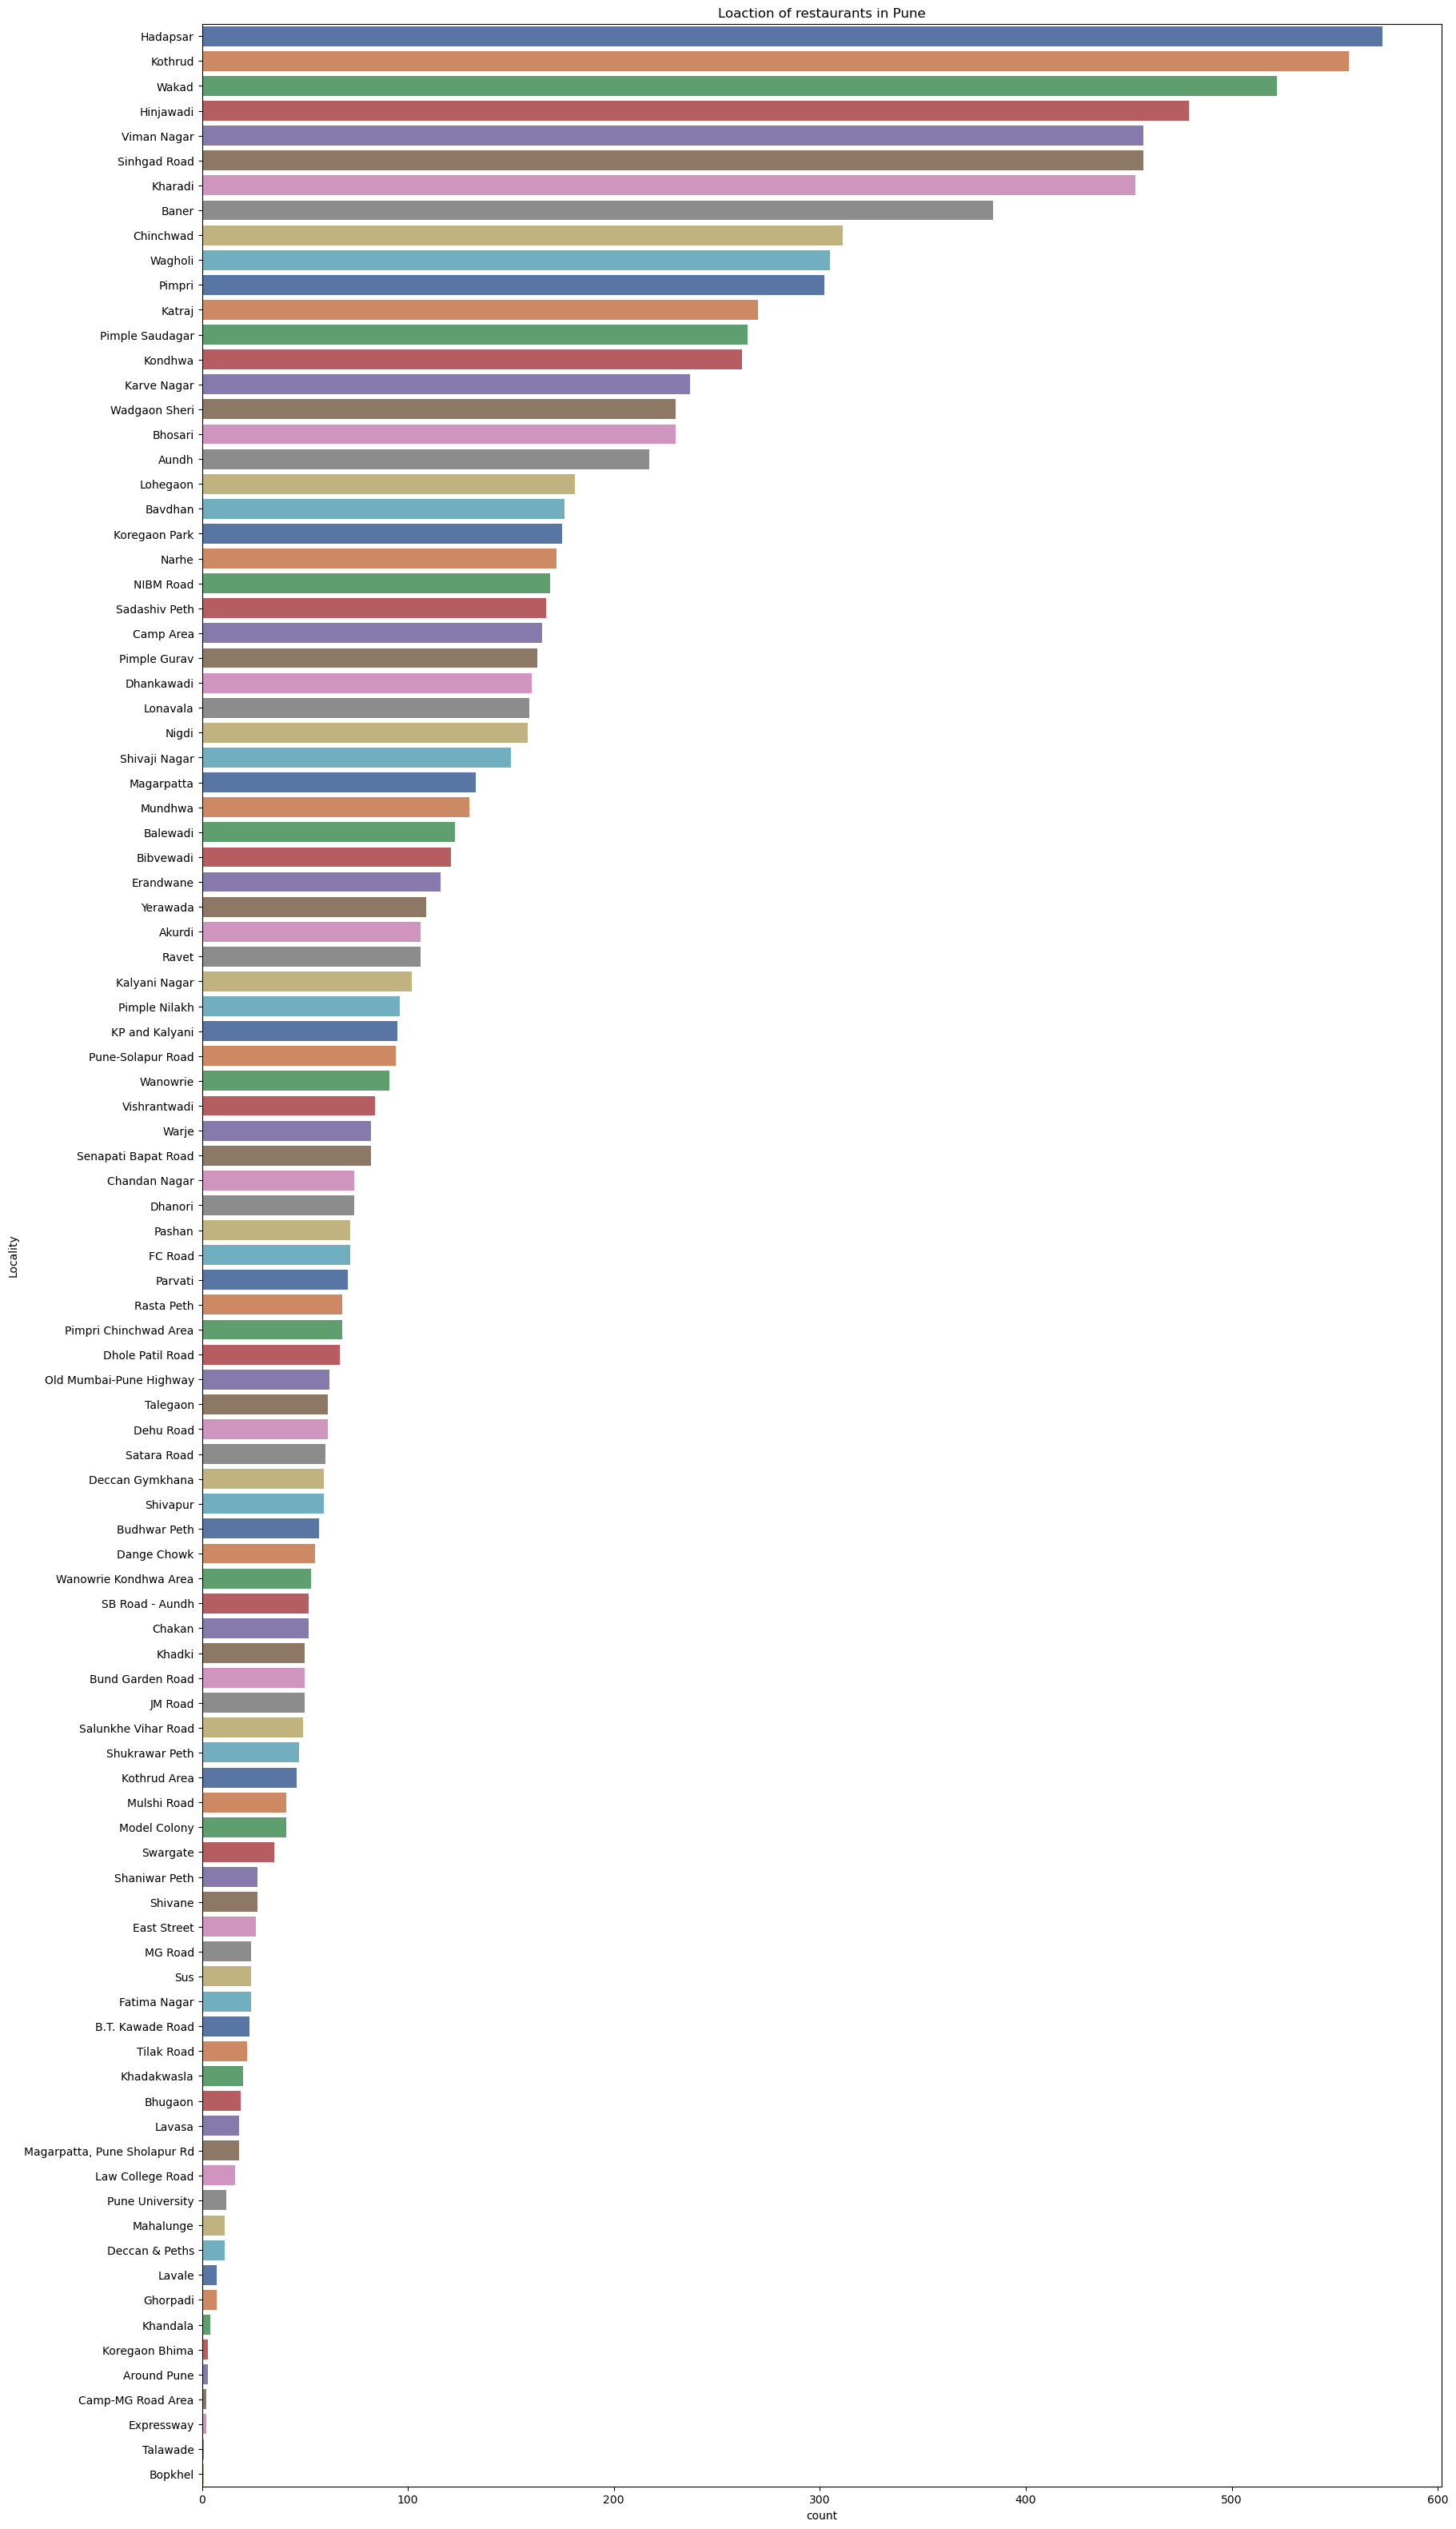

In [31]:
plt.figure(figsize=  (20,40))
chains = df['Locality'].value_counts()#[:20]
sns.barplot(x = chains, y=  chains.index,  palette= 'deep')
plt.title('Loaction of restaurants in Pune')
plt.show()

In [32]:
df = df.rename(columns = {'Sponsored':'Restaurant Type'})

In [33]:
df.head()

,Restaurant_Name,Zomato_Link,Locality,Restaurant Type,Ratings_out_of_5,Number of votes,Phone_number,Cuisines,Cost,payment_modes,...,Private Dining Area Available,Smoking ALlowed,Table booking recommended,Resto Bar,Serves Alcohol,Breakfast,Catering Available,Disabled Friendly,Takeaway Only,spam_review
0,AB's - Absolute Barbecues,https://www.zomato.com/pune/abs-absolute-barbe...,Hinjawadi,Casual Dining,4.9,7029,+91 9373112211,"Continental, North Indian, Chinese",1400.0,Cash and Cards accepted,...,0,0,1,0,0,0,0,0,0,1539.0
1,Cafe Co2 Resto Lounge,https://www.zomato.com/pune/cafe-co2-resto-lou...,Bhugaon,"Lounge, Casual Dining",4.6,2578,080 46971866,"North Indian, Chinese, Continental, Kebab, Sea...",1500.0,Cash and Cards accepted,...,0,1,1,0,0,0,0,0,0,139.0
2,Paasha - JW Marriott Pune,https://www.zomato.com/pune/paasha-jw-marriott...,Senapati Bapat Road,Fine Dining,4.6,3291,080 46971369,"North Indian, Kebab, Biryani",2500.0,"Cash,Cards and Digital Payments accepted",...,0,0,1,0,0,0,0,0,0,119.0
3,I Amsterdam,https://www.zomato.com/pune/i-amsterdam-hinjawadi,Hinjawadi,"Casual Dining, Bar",4.3,430,+91 8669698666 +91 8669697666,"Asian, European, Modern Indian, Italian",1400.0,"Cash,Cards and Digital Payments accepted",...,0,1,1,0,0,0,0,0,0,8.0
4,FC Road Social,https://www.zomato.com/pune/fc-road-social-shi...,Shivaji Nagar,"Bar, Casual Dining",4.5,2138,+91 9172378889 020 29805112,"North Indian, Chinese, Biryani, American, Cont...",1500.0,"Cash,Cards and Digital Payments accepted",...,0,0,0,0,0,1,0,0,0,132.0


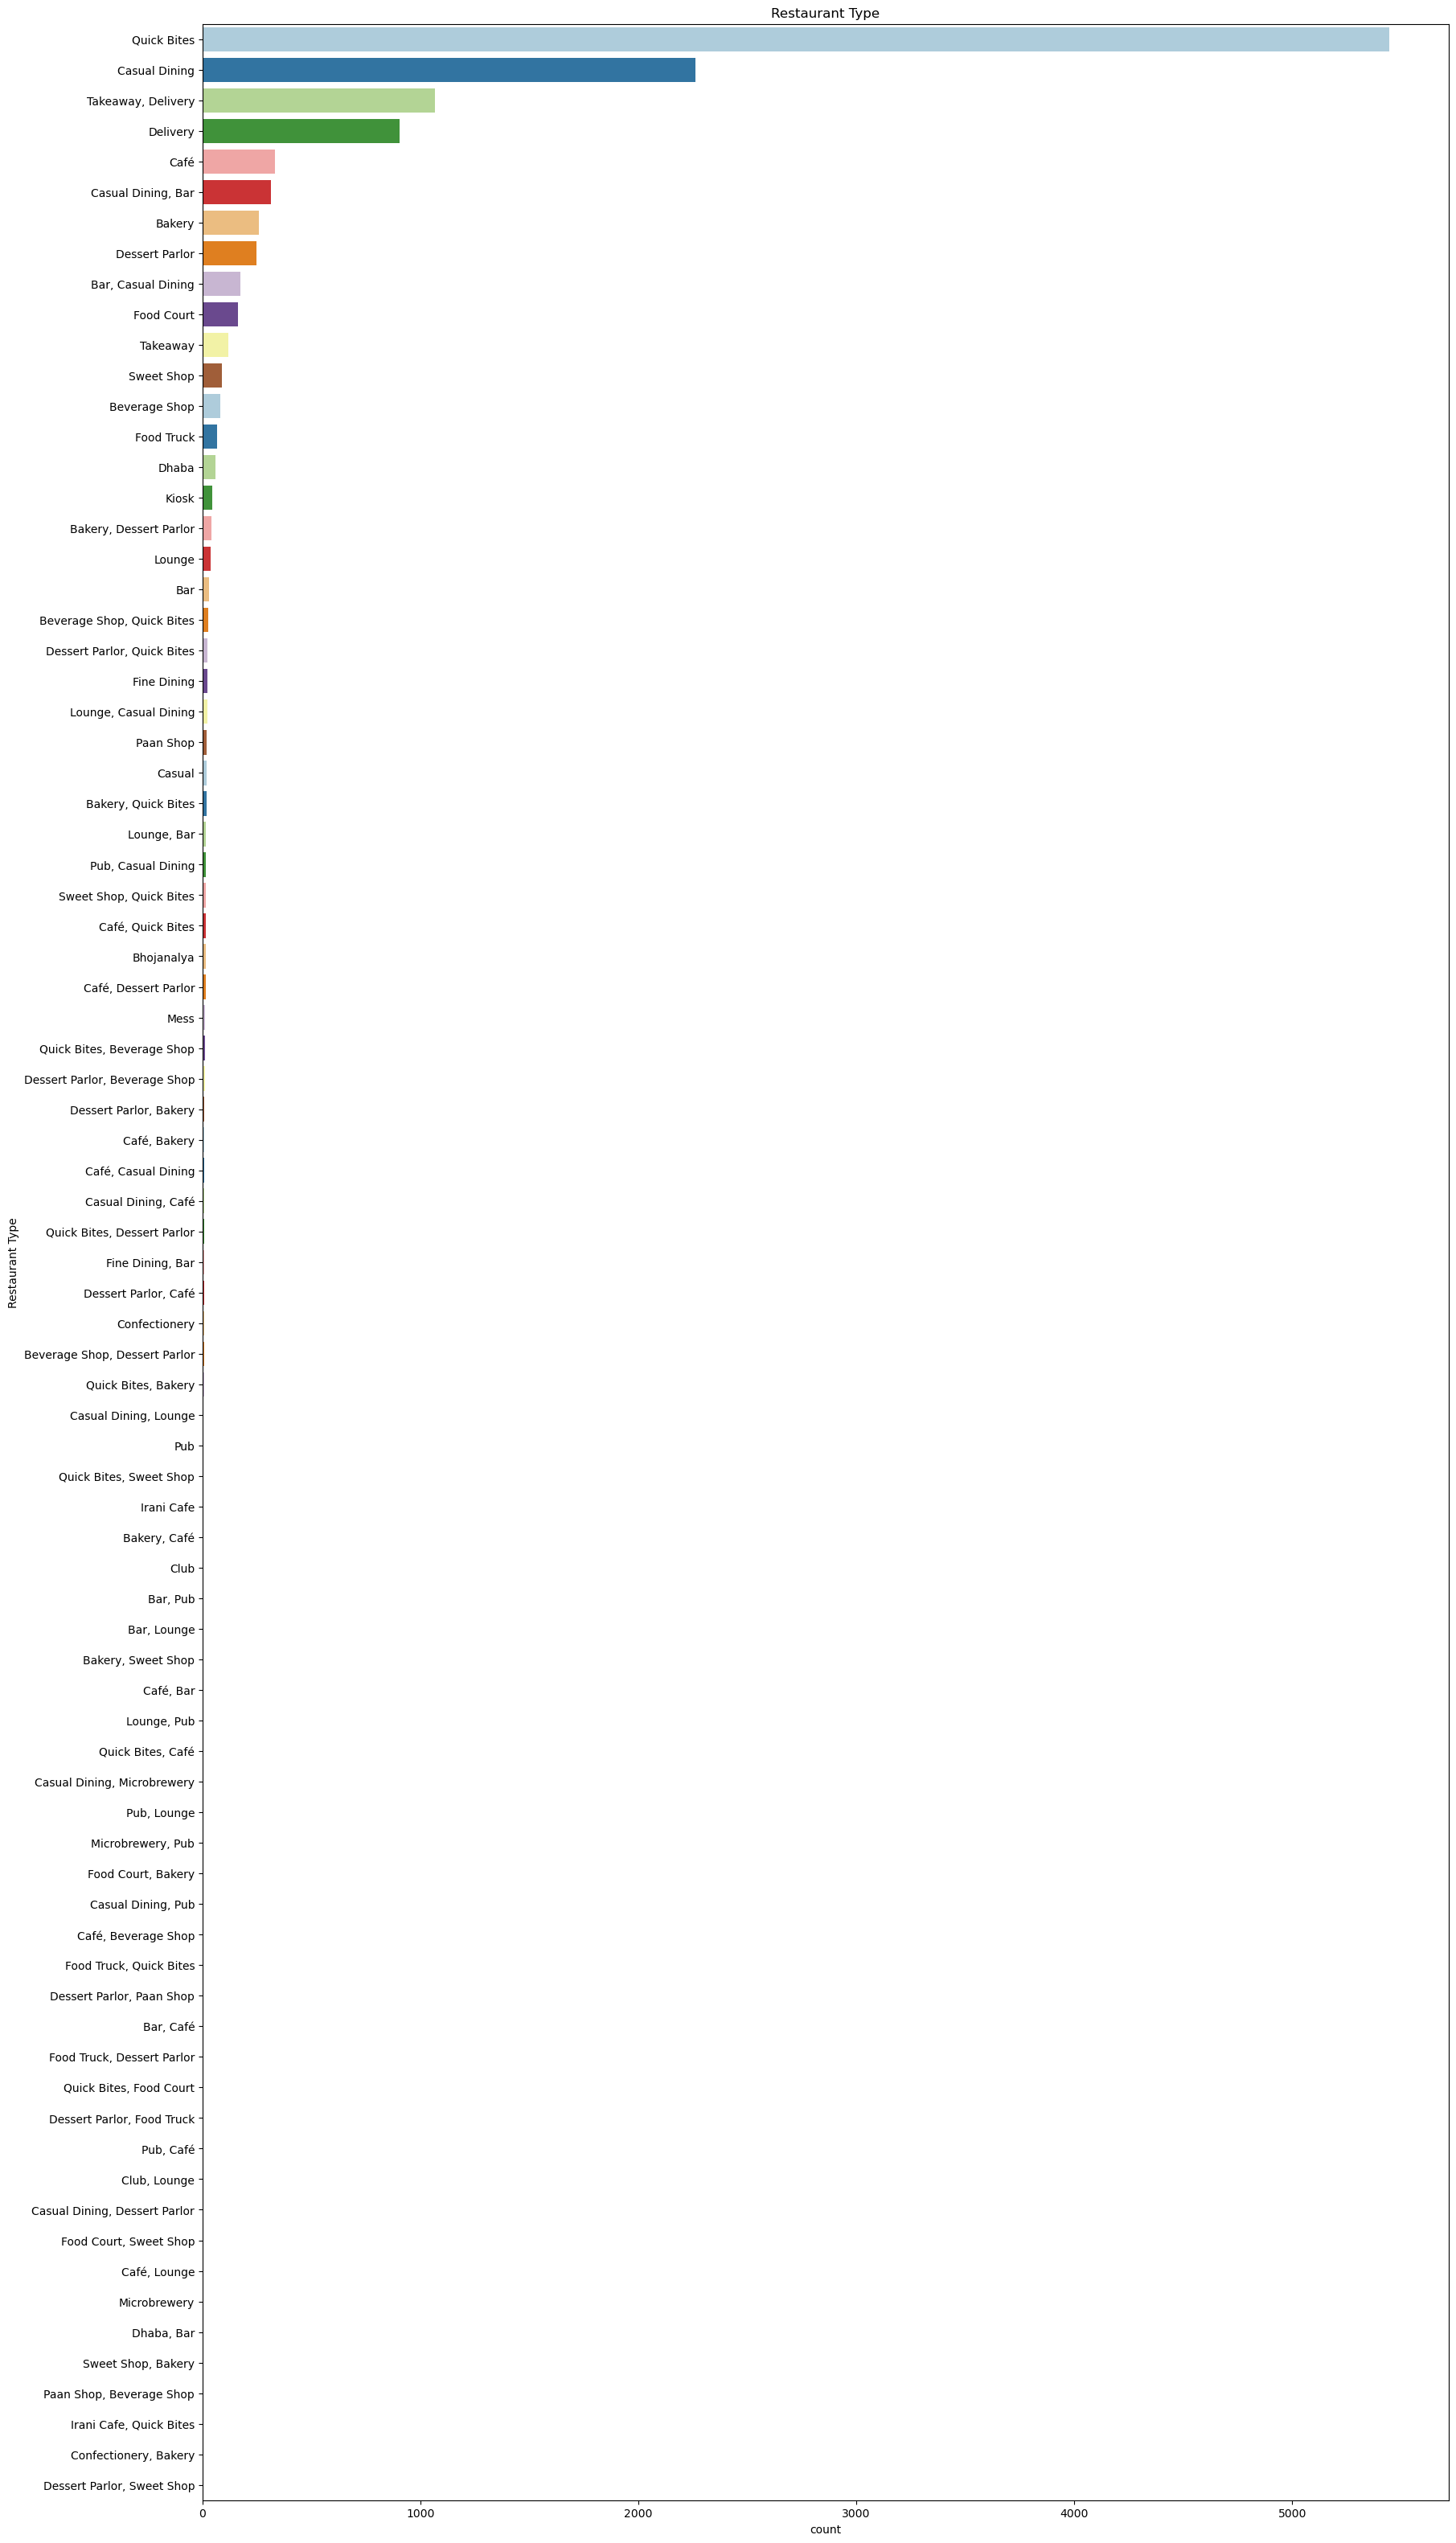

In [34]:
plt.figure(figsize = (20,40))
t = df['Restaurant Type'].value_counts()
sns.barplot(y = t.index ,x = t, palette = 'Paired')
plt.title('Restaurant Type')
plt.show()
plt.show()

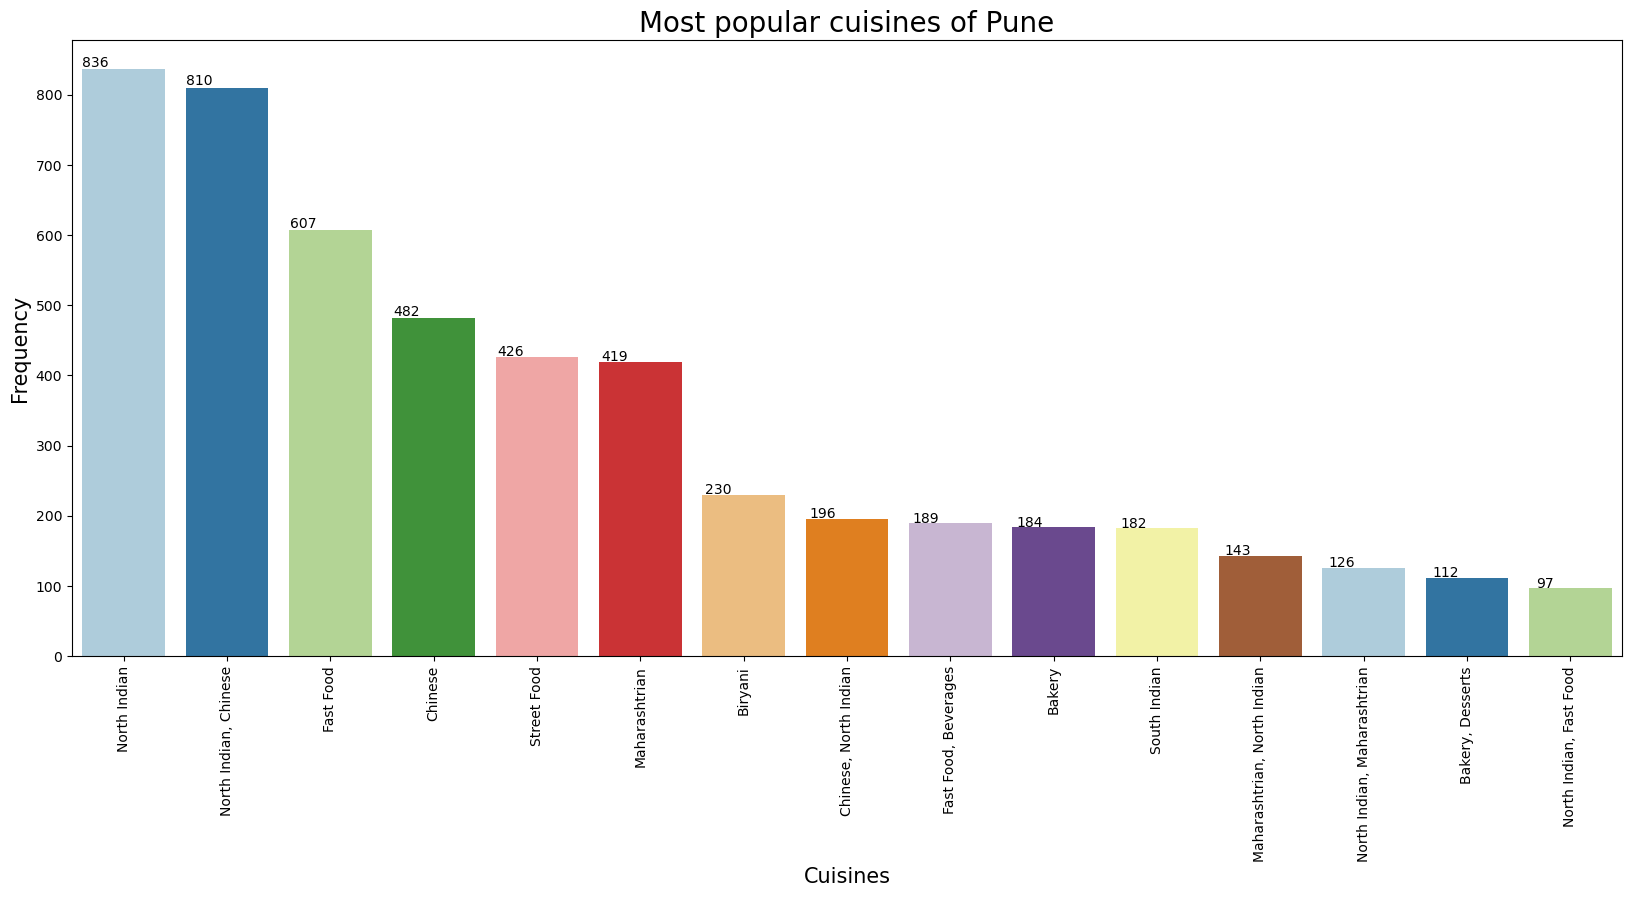

In [35]:
v = df['Cuisines'].value_counts()[:15]
plt.figure(figsize = (20,8))

ax  = sns.barplot(x = v.index, y = v, palette = 'Paired')

for i in ax.patches:
    ax.annotate(i.get_height().astype(int), (i.get_x()*1.005, i.get_height()*1.005))
    
#This loop goes through each bar in the plot (ax.patches) and adds text annotations.
#The annotation displays the height of each bar (frequency) at a slightly adjusted position for better visibility.

plt.title('Most popular cuisines of Pune', fontsize = 20)
plt.xlabel('Cuisines', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(rotation =90)
plt.show()

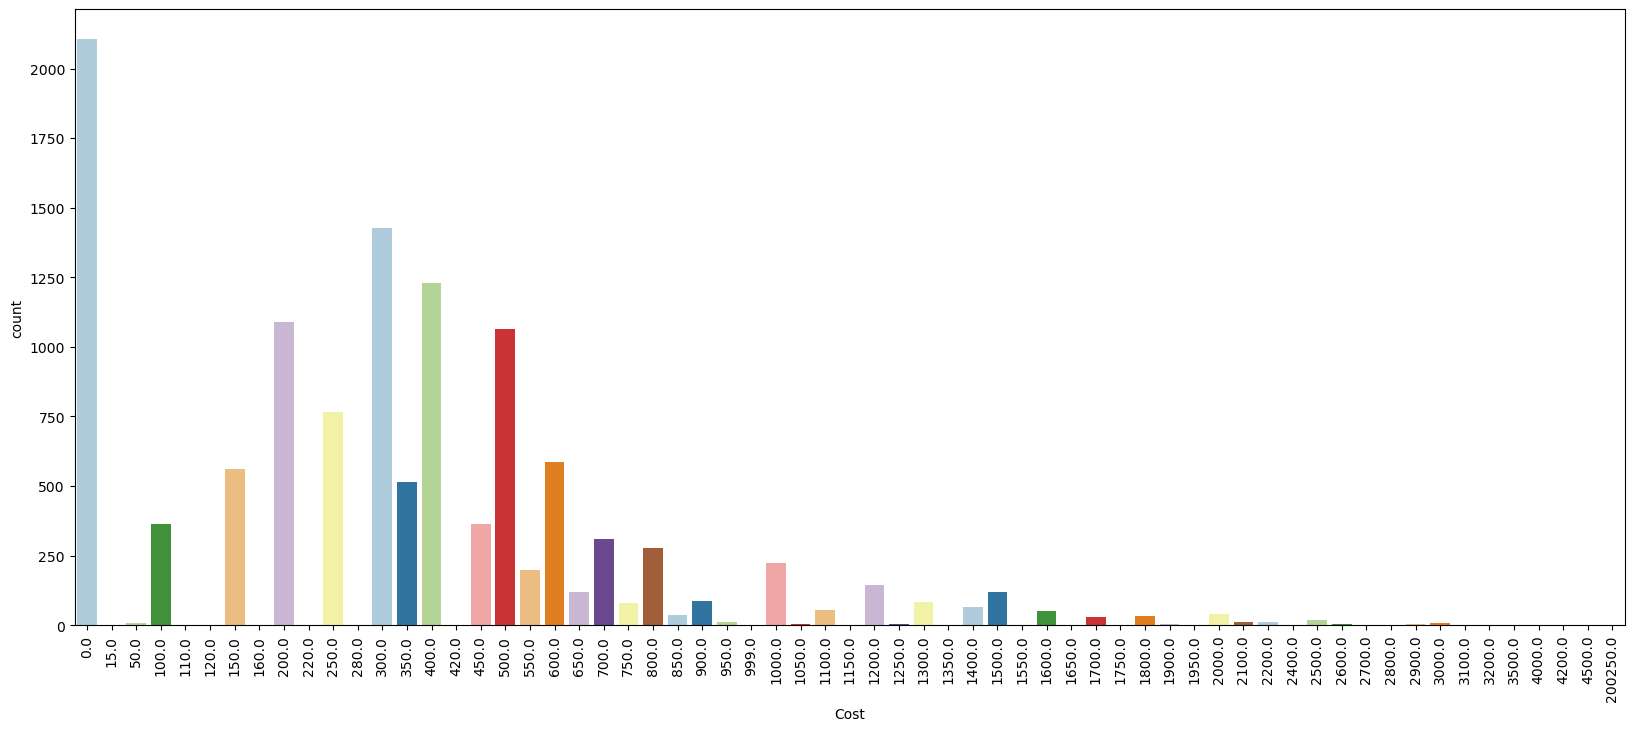

In [36]:
v = df['Cost'].value_counts()
plt.figure(figsize = (20,8))

sns.barplot(x = v.index, y = v, palette = 'Paired')
plt.xticks(rotation  =90)
plt.show()

In [38]:
df = df.rename(columns = {'Restaurant Type':'Restaurant_Type',
                         'Table booking recommended':'Table_booking_recommended'})
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #instance creation of label encoder
df.Locality = le.fit_transform(df.Locality)
df.Restaurant_Type = le.fit_transform(df.Restaurant_Type)
df.Cuisines = le.fit_transform(df.Cuisines)
df.payment_modes = le.fit_transform(df.payment_modes)
#df.menu_item = le.fit_transform(df.menu_item)

df.Table_booking_recommended = le.fit_transform(df.Table_booking_recommended)

In [39]:
my_data = df.iloc[:,[2,3,4,5,7,8,9,11]]

my_data.to_csv('zomato_pune_V002.csv')

In [40]:
my_data.head()

,Locality,Restaurant_Type,Ratings_out_of_5,Number of votes,Cuisines,Cost,payment_modes,5_star_review_percentage
0,32,23,4.9,7029,783,1400.0,1,79
1,8,58,4.6,2578,1626,1500.0,1,61
2,78,45,4.6,3291,1932,2500.0,6,62
3,32,24,4.3,430,61,1400.0,6,45
4,80,7,4.5,2138,1595,1500.0,6,63


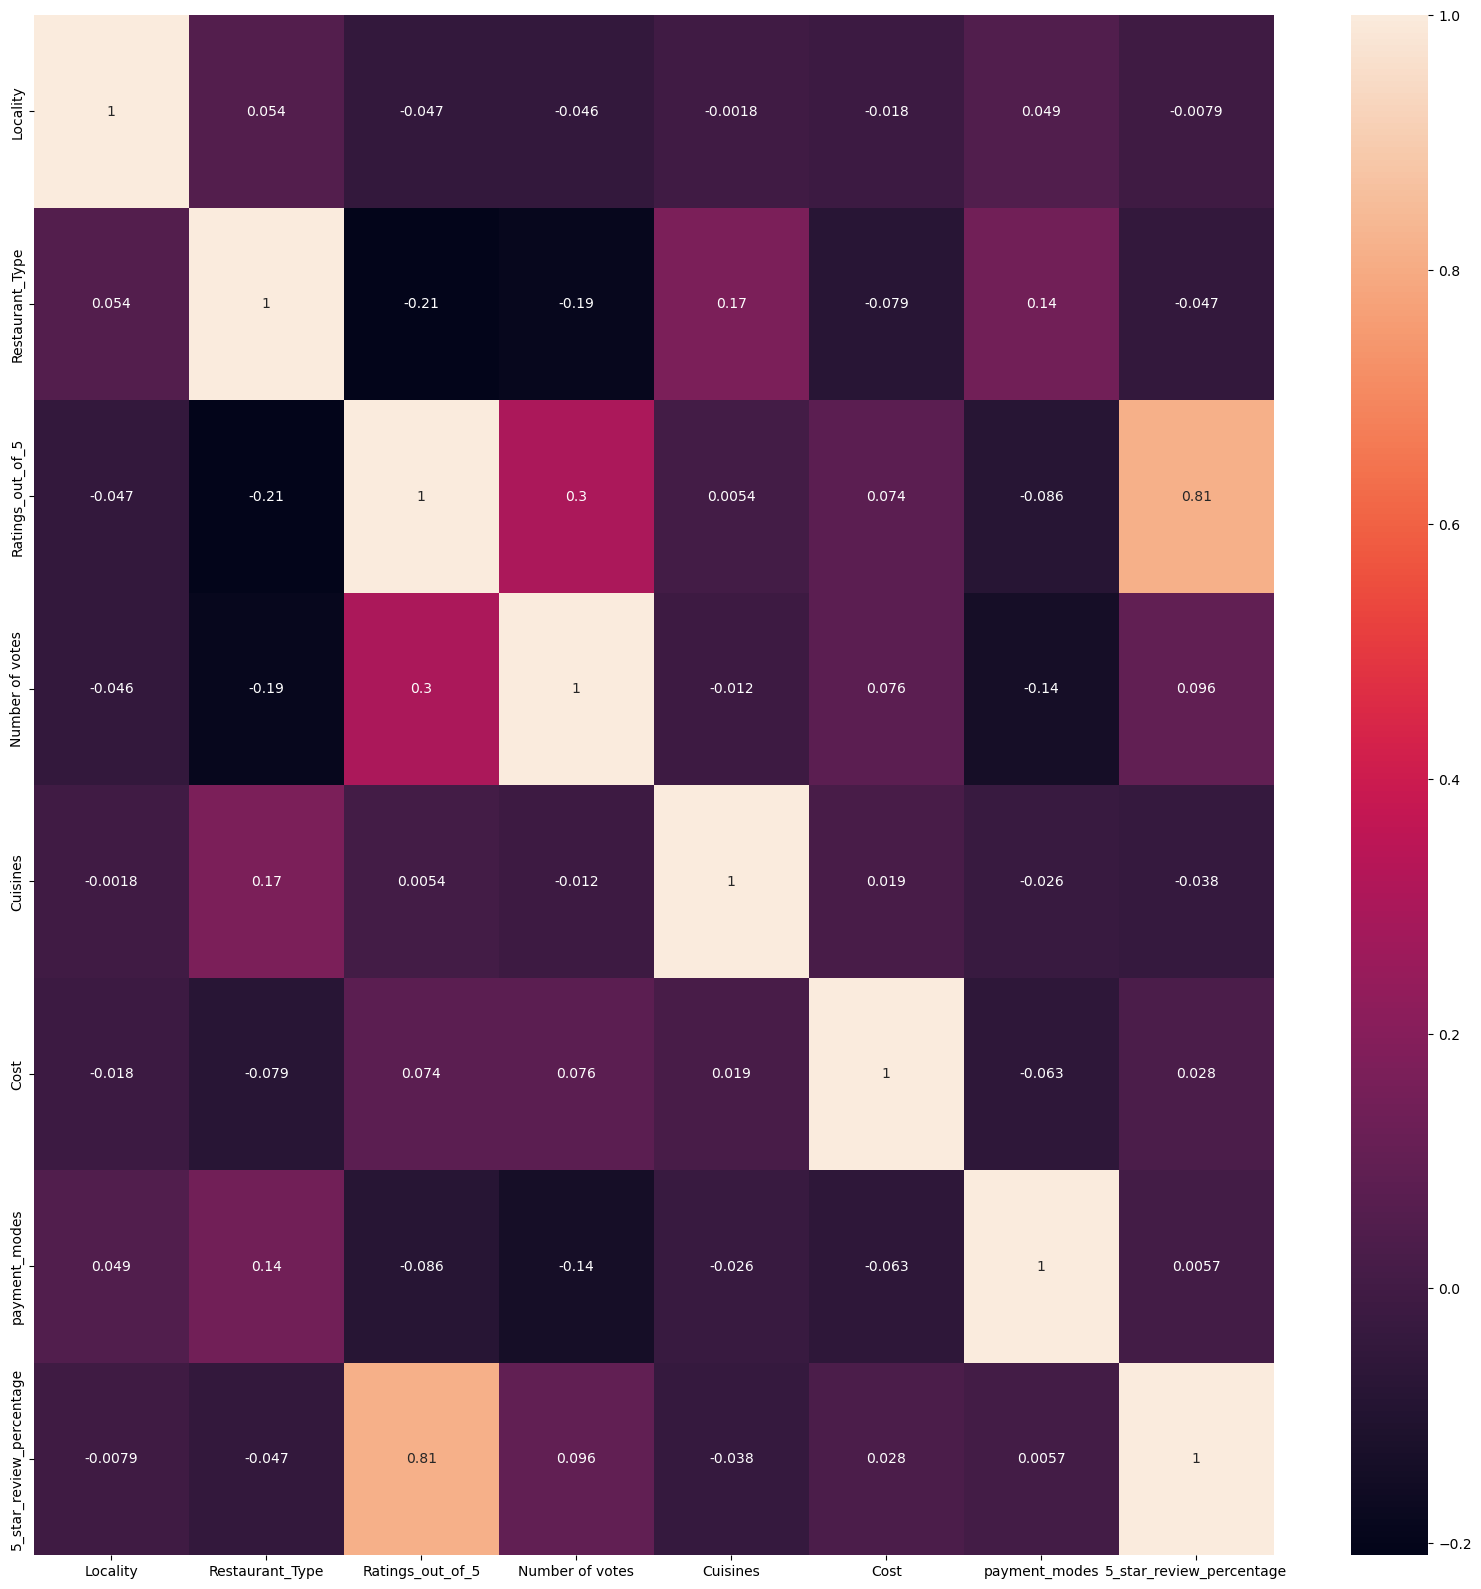

In [41]:
plt.figure(figsize = (20,20))
sns.heatmap(my_data.corr(), annot = True)
plt.show()

In [42]:
X = df.iloc[:,[2,3,5,7,8,9,11]]
y = df['Ratings_out_of_5']
X

,Locality,Restaurant_Type,Number of votes,Cuisines,Cost,payment_modes,5_star_review_percentage
0,32,23,7029,783,1400.0,1,79
1,8,58,2578,1626,1500.0,1,61
2,78,45,3291,1932,2500.0,6,62
3,32,24,430,61,1400.0,6,45
4,80,7,2138,1595,1500.0,6,63
...,...,...,...,...,...,...,...
12184,32,80,0,479,0.0,3,0
12185,41,80,0,1488,0.0,5,0
12186,37,69,0,2377,300.0,3,0
12187,45,24,0,1879,1200.0,6,0


In [43]:
y

0        4.9
1        4.6
2        4.6
3        4.3
4        4.5
        ... 
12184    0.0
12185    0.0
12186    0.0
12187    0.0
12188    0.0
Name: Ratings_out_of_5, Length: 12134, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=10)

In [45]:
X_train

,Locality,Restaurant_Type,Number of votes,Cuisines,Cost,payment_modes,5_star_review_percentage
1705,22,23,129,1788,500.0,1,41
7223,68,69,0,200,250.0,5,0
11602,17,69,0,1581,300.0,3,0
2772,67,69,8,2318,500.0,5,87
6456,77,76,15,1442,150.0,1,46
...,...,...,...,...,...,...,...
7334,92,69,7,1119,300.0,1,71
11688,5,23,160,1581,600.0,1,41
1352,73,43,125,1326,400.0,1,56
7336,74,52,61,2072,400.0,1,26


In [46]:
y_train

1705     3.6
7223     0.0
11602    0.0
2772     3.2
6456     3.2
        ... 
7334     3.2
11688    3.5
1352     3.8
7336     2.2
1297     0.0
Name: Ratings_out_of_5, Length: 8493, dtype: float64

In [47]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

#predict the test set
y_pred = lr.predict(X_test)

## Evaluate the model
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.7215985462656012


In [48]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(min_samples_leaf=0.01)

dtr.fit(X_train,y_train)

# Predict the test ser
y_pred  = dtr.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))

0.9793106551145742


In [55]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
rfr.fit(X_train,y_train)

# Predict the test ser
y_pred  = rfr.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))

0.9786961383626938


In [52]:
from sklearn.svm import SVR
svr = SVR(kernel ='rbf')

svr.fit(X_train, y_train)

# predict the test set
y_pred = svr.predict(X_test)

# Evaluate the performance
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.7656820765977232


In [53]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(n_estimators = 120)

etr.fit(X_train, y_train)

# predict the test set
y_pred = etr.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.9788756023512171


In [56]:
import pandas as pd

# Assuming your DataFrame is named 'your_dataframe'
# Replace 'your_dataframe' with the actual name of your DataFrame

# To export as CSV
df.to_csv('dataframe.csv', index=False)
